* 나눔폰트 설치, 음수부호 설정, 디스플레이 화질 상향 설정 후 코딩 진행

In [ ]:
# 한글깨짐 수정/ 설치후 런타임 재시작
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [77]:
import matplotlib as mpl
import matplotlib.pylab as plb
import matplotlib.pyplot as plt

# 브라우저에서 바로 그려지도록 
%matplotlib inline
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 
# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

---

###0. 데이터 전처리

In [120]:
import pandas as pd
import numpy as np
import openpyxl
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency

In [121]:
# Local에서 데이터 불러오기
from google.colab import files
uploaded = files.upload()

Saving vgames2.csv to vgames2 (2).csv


In [122]:
import io

df = pd.read_csv(io.StringIO(uploaded['vgames2.csv'].decode('utf-8')))   
df.head()

Unnamed: 0  ... Other_Sales
0           1  ...           0
1           2  ...        0.01
2           3  ...           0
3           4  ...           0
4           5  ...        0.04

[5 rows x 10 columns]

In [123]:
df.dtypes

Unnamed: 0       int64
Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

In [124]:
# 각 지역 출고량 단위 통일
def KM(string):
    data = (df[string].replace(r'[KM]+$', '', regex=True).astype(float) * 
            df[string].str.extract(r'[\d\.]+([KM]+)', expand=False)
              .fillna(1)
              .replace(['K','M'], [0.001, 1]).astype(float)) 
    return data

In [125]:
df['NA_Sales'] = KM('NA_Sales')
df['EU_Sales'] = KM('EU_Sales')
df['JP_Sales'] = KM('JP_Sales')
df['Other_Sales'] = KM('Other_Sales')

---

###1. 지역에 따른 선호 게임 장르

 > 모든 연도에 대한 지역별, 장르별 출고량



In [63]:
df_01 = df.melt(id_vars = 'Genre', value_vars = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])

In [64]:
df_01 = df_01.rename(
        columns = {
        'variable': 'Local_area', 
        'value': 'amount'
        }
)
df_01

Genre   Local_area  amount
0         Action     NA_Sales    0.04
1         Action     NA_Sales    0.17
2      Adventure     NA_Sales    0.00
3           Misc     NA_Sales    0.04
4       Platform     NA_Sales    0.12
...          ...          ...     ...
66387   Platform  Other_Sales    0.01
66388     Action  Other_Sales    0.00
66389     Sports  Other_Sales    0.13
66390     Action  Other_Sales    0.03
66391   Fighting  Other_Sales    0.01

[66392 rows x 3 columns]

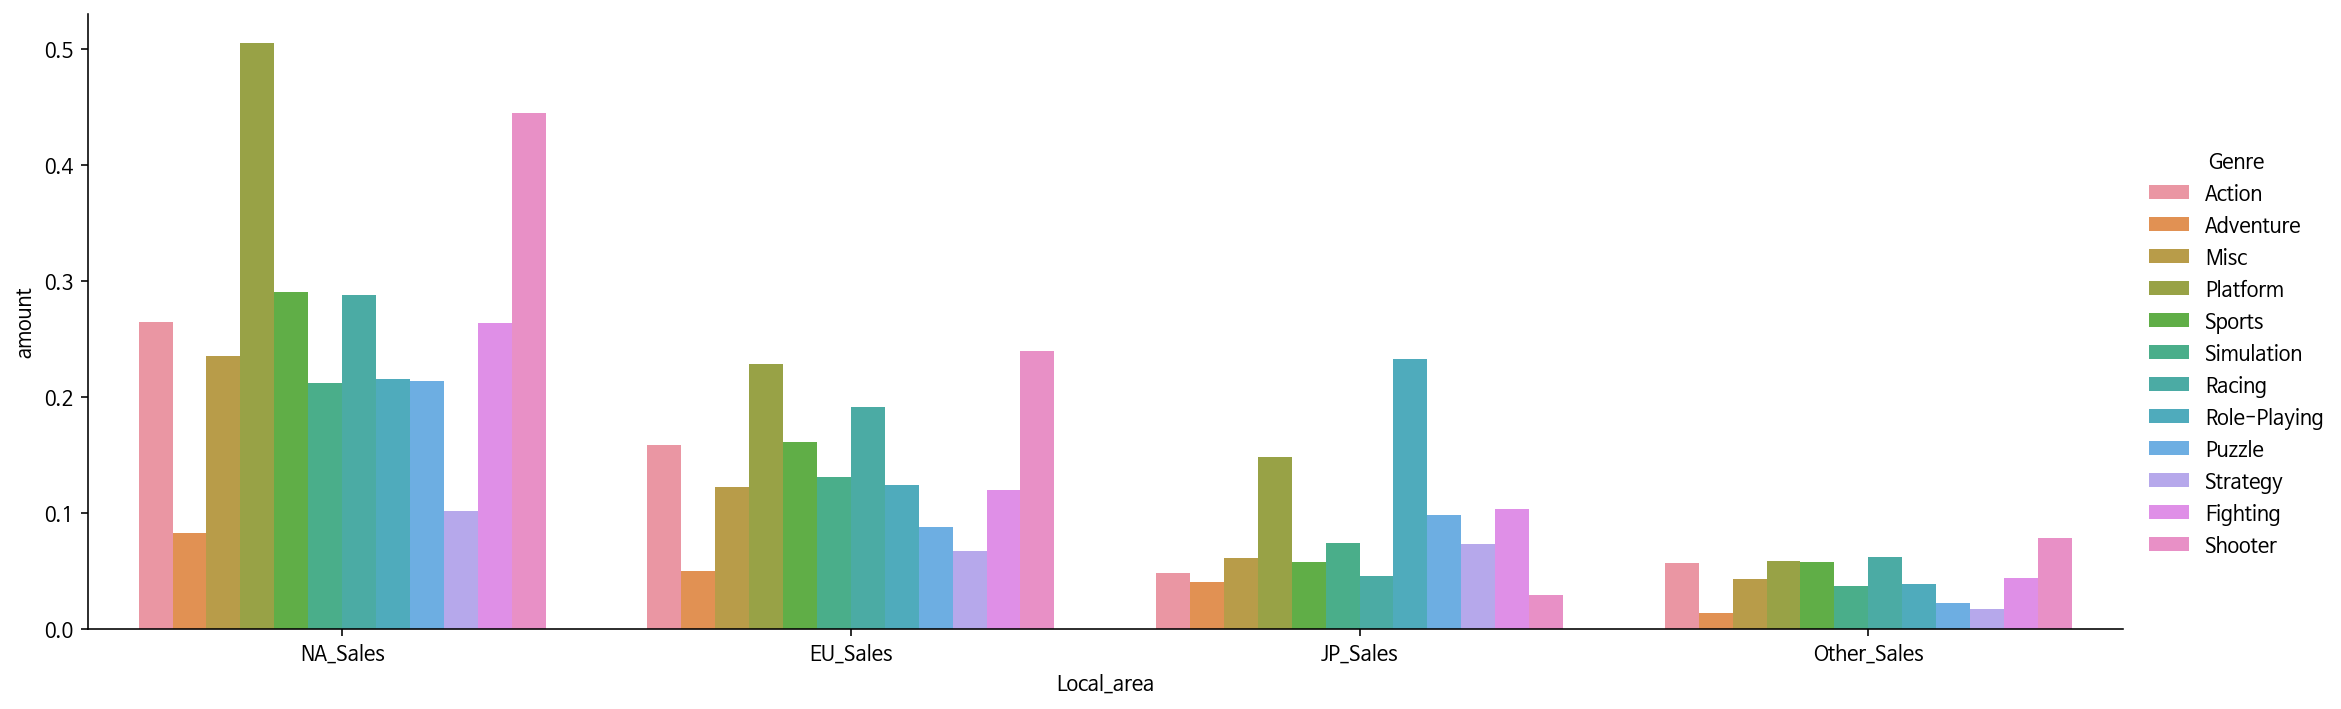

In [65]:
sns.catplot(x = 'Local_area', y = 'amount', hue = 'Genre', kind = 'bar', ci=None, data = df_01, height = 5, aspect=3);

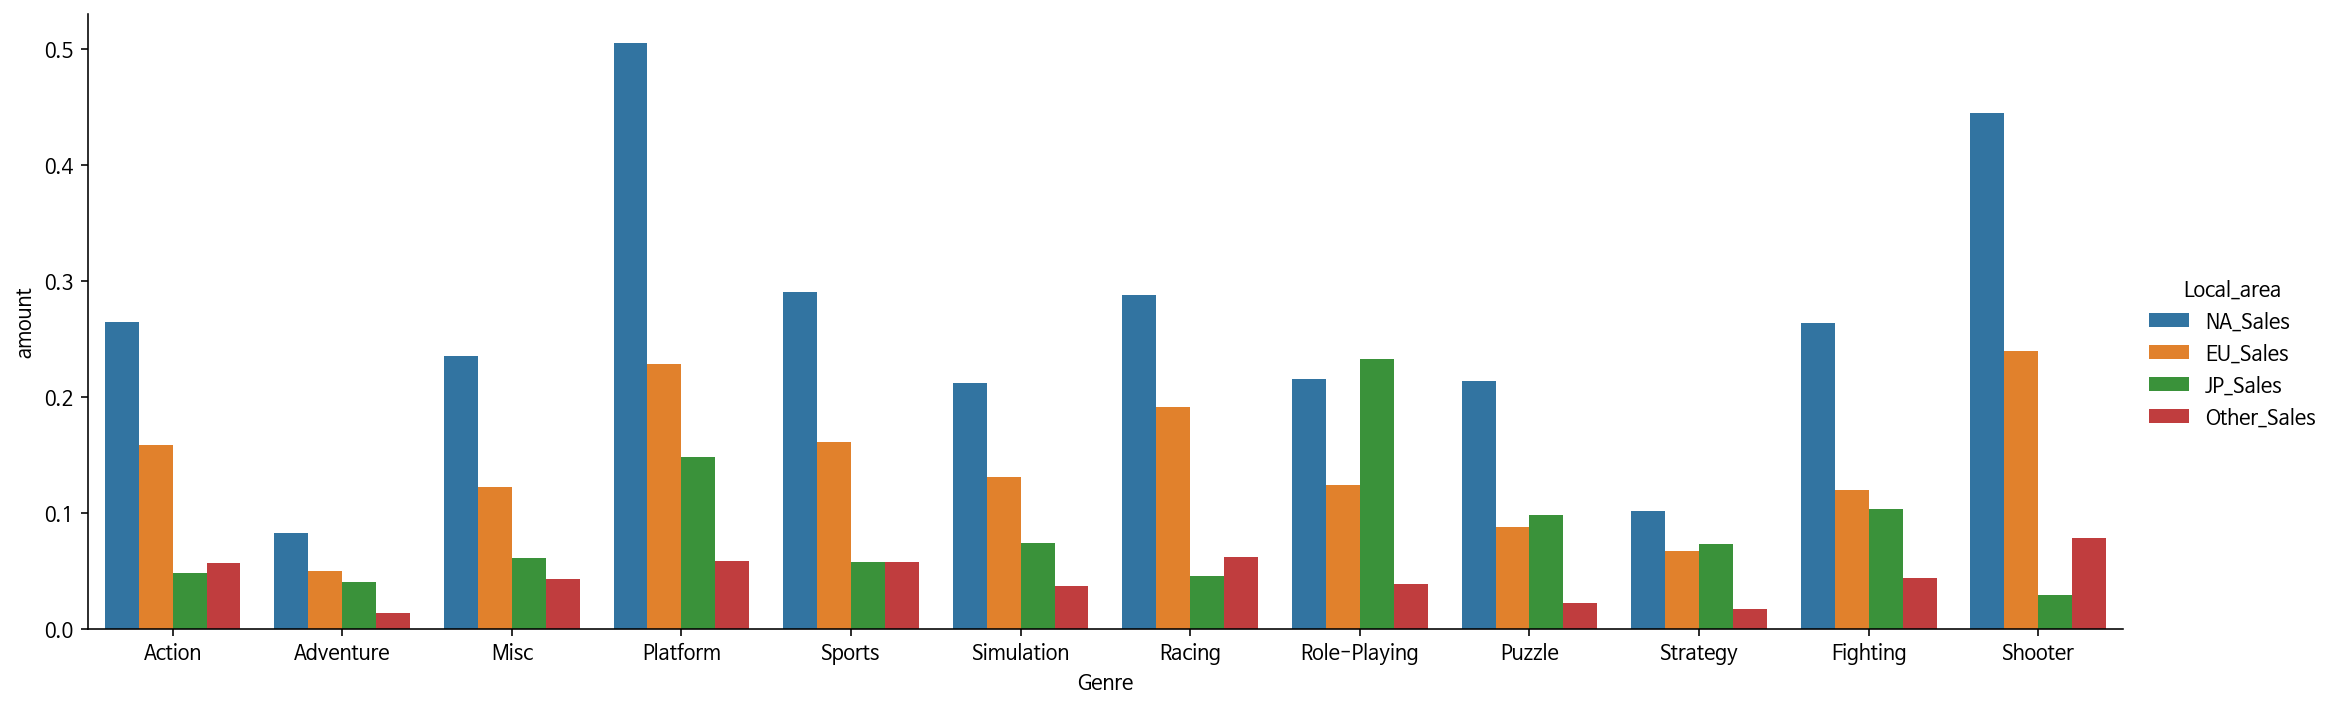

In [66]:
sns.catplot(x = 'Genre', y = 'amount', hue = 'Local_area', kind = 'bar', ci=None, data = df_01, height = 5, aspect=3);

---

###2. 연도별 게임 트랜드
> 2010년 이후 게임 트랜드




In [84]:
df_02 = df.melt(id_vars = ['Year', 'Genre'], value_vars = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])

In [85]:
df_02 = df_02.dropna()

In [86]:
# 연도 정리
def to_num(year):
    for i in range(99):
        if i <= 20:
            if year == i:
                year = 2000 + i
        else :
            if year == i:
                year = 1900 + i
    return int(year)

In [87]:
df_02['Year'] = df_02['Year'].apply(to_num)
df_02

Year      Genre     variable  value
0      2008     Action     NA_Sales   0.04
1      2009     Action     NA_Sales   0.17
2      2010  Adventure     NA_Sales   0.00
3      2010       Misc     NA_Sales   0.04
4      2010   Platform     NA_Sales   0.12
...     ...        ...          ...    ...
66387  2006   Platform  Other_Sales   0.01
66388  2005     Action  Other_Sales   0.00
66389  2015     Sports  Other_Sales   0.13
66390  2013     Action  Other_Sales   0.03
66391  1996   Fighting  Other_Sales   0.01

[65108 rows x 4 columns]

In [88]:
# 2010년 전의 데이터 제거
for i in range(1980,2010): 
    df_02 = df_02[df_02['Year'] != i]
# 2017~2021년 데이터 제거 (내용이 별로 없음)
for i in range(2017,2021):
    df_02 = df_02[df_02['Year'] != i]

In [89]:
# 각 지역별 정리
df_021 = df_02[df_02['variable'] == 'NA_Sales']
df_022 = df_02[df_02['variable'] == 'EU_Sales']
df_023 = df_02[df_02['variable'] == 'JP_Sales']
df_024 = df_02[df_02['variable'] == 'Other_Sales']

In [90]:
df_020 = df_02.drop(['variable'], axis=1)

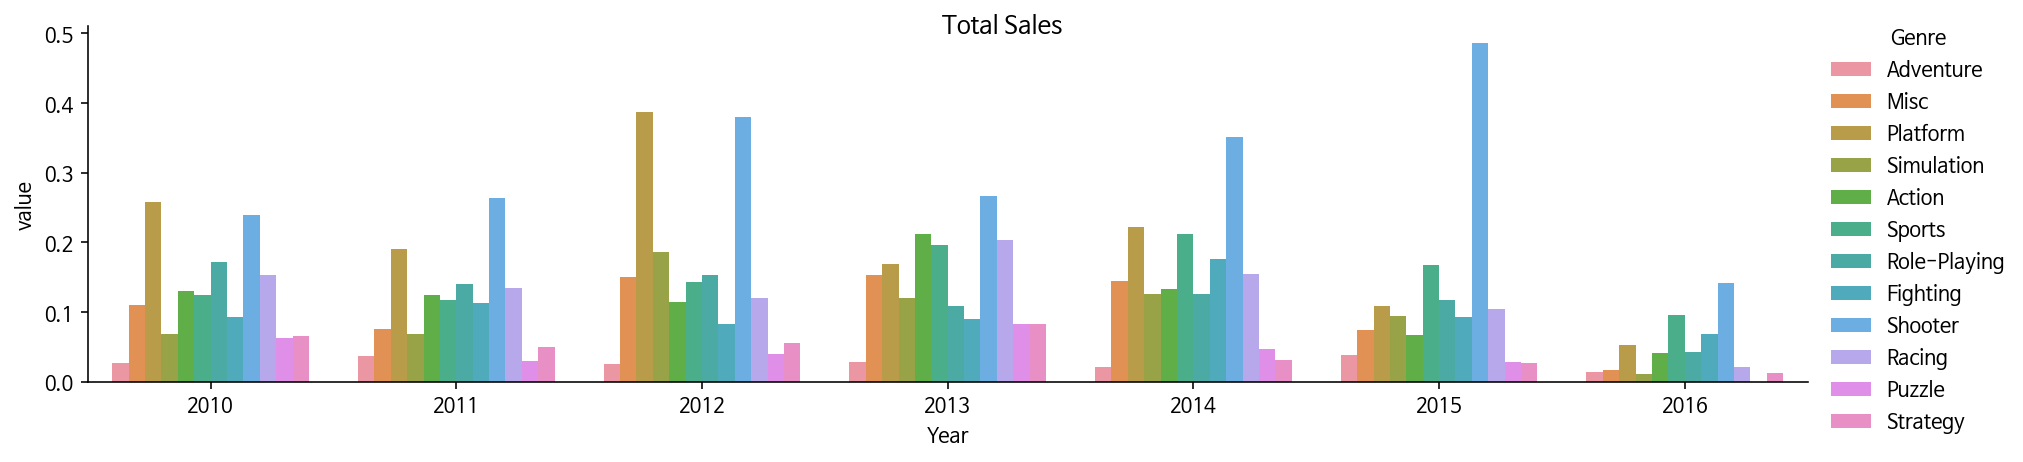

In [91]:
df_020 = sns.catplot(x = 'Year', y = 'value', hue = 'Genre', kind = 'bar', ci=None, data = df_020, height = 3.2, aspect=4, legend=True)
df_020.fig.suptitle('Total Sales');

In [92]:
df_021 = sns.catplot(x = 'Year', y = 'value', hue = 'Genre', kind = 'bar', ci=None, data = df_021, height = 3.2, aspect=4, legend=True)
df_021.fig.suptitle('NA_Sales');

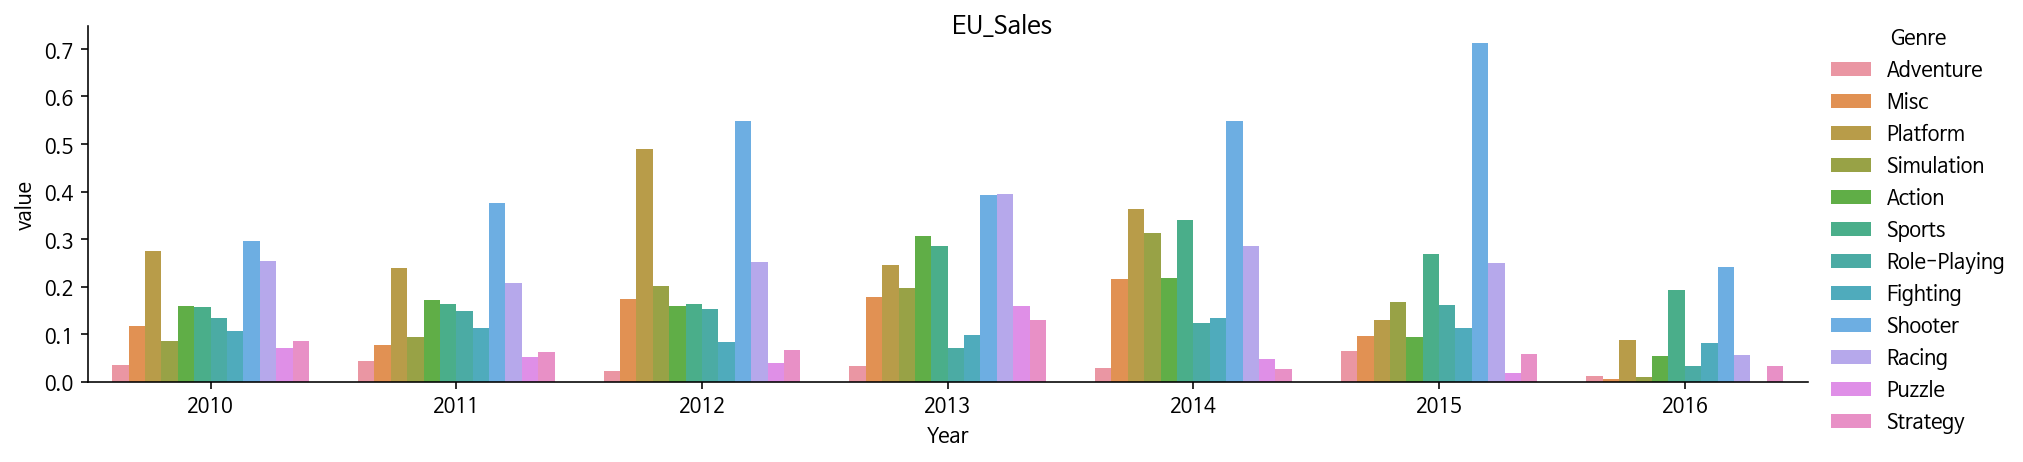

In [93]:
df_022 = sns.catplot(x = 'Year', y = 'value', hue = 'Genre', kind = 'bar', ci=None, data = df_022, height = 3.2, aspect=4, legend=True)
df_022.fig.suptitle('EU_Sales');

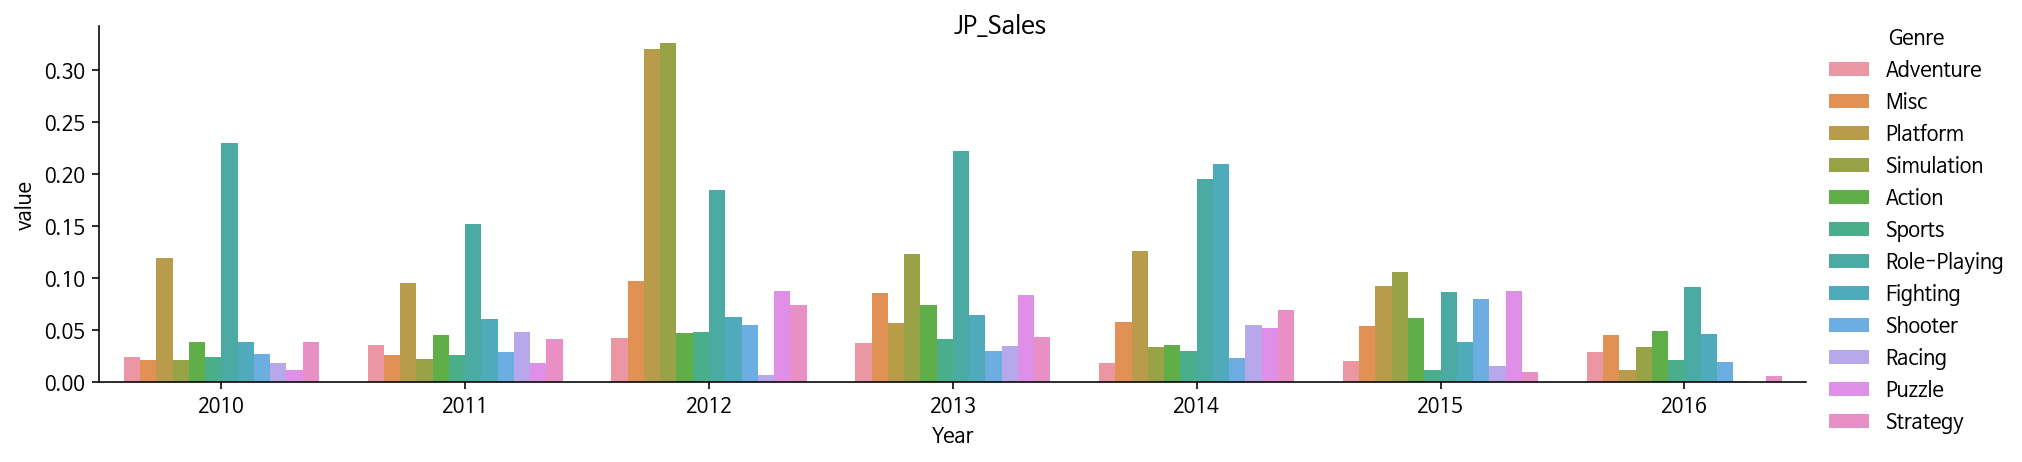

In [94]:
df_023 = sns.catplot(x = 'Year', y = 'value', hue = 'Genre', kind = 'bar', ci=None, data = df_023, height = 3.2, aspect=4, legend=True)
df_023.fig.suptitle('JP_Sales');

In [95]:
df_024 = sns.catplot(x = 'Year', y = 'value', hue = 'Genre', kind = 'bar', ci=None, data = df_024, height = 3.2, aspect=4, legend=True)
df_024.fig.suptitle('Other_Sales');

---

###3. 출고량이 높은 게임에 대한 분석
 >  출고량 TOP XX 에 대한 Genre 선호도 분석

In [96]:
df_03 = df

In [97]:
df_03['Total_Sales'] = round(df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales'], 2)
df_03 = df_03.fillna('-')

In [98]:
# 자동변수 지정
# portion : 기준치 이하 장르에 대하여 etc(기타, 100%기준)로 처리할 비율
# range : 제일 높은 출고량 순으로 몇개 까지 볼것인가 ex) [10, 50, 100]
def top10(portion,range,genre): 
    for i in range:
        globals()['df_03_top{}'.format(i)] = df_03.sort_values(by='Total_Sales', ascending=False).head(i)
        globals()['df_03_{}'.format(i)] = globals()['df_03_top{}'.format(i)][genre].value_counts()
        globals()['df_03_{}'.format(i)] = globals()['df_03_{}'.format(i)].reset_index()
        globals()['df_03_{}'.format(i)].loc[len(globals()['df_03_{}'.format(i)])] = globals()['df_03_{}'.format(i)].loc[globals()['df_03_{}'.format(i)][genre] < portion/100*len(globals()['df_03_top{}'.format(i)]),[genre]].sum(axis=0)
        globals()['df_03_{}'.format(i)] = globals()['df_03_{}'.format(i)].fillna('etc')
        globals()['df_03_{}'.format(i)] = globals()['df_03_{}'.format(i)][globals()['df_03_{}'.format(i)][genre] >= portion/100*len(globals()['df_03_top{}'.format(i)])]
        pie_chart(i,genre) # 파이차트 함수 호출
    

In [99]:
# 파이차트 함수
def pie_chart(i,genre):
    explode = [] 
    for x in range(len(globals()['df_03_{}'.format(i)])):
        explode.append(0.1)

    plt.rcParams["figure.figsize"] = (12, 8)
    plt.pie(globals()['df_03_{}'.format(i)][genre], labels =globals()['df_03_{}'.format(i)]['index'] , autopct='%.1f%%', counterclock=False, startangle=90, explode=explode,shadow=False)
    plt.title('TOP {}'.format(i), fontsize=20);
    plt.show()

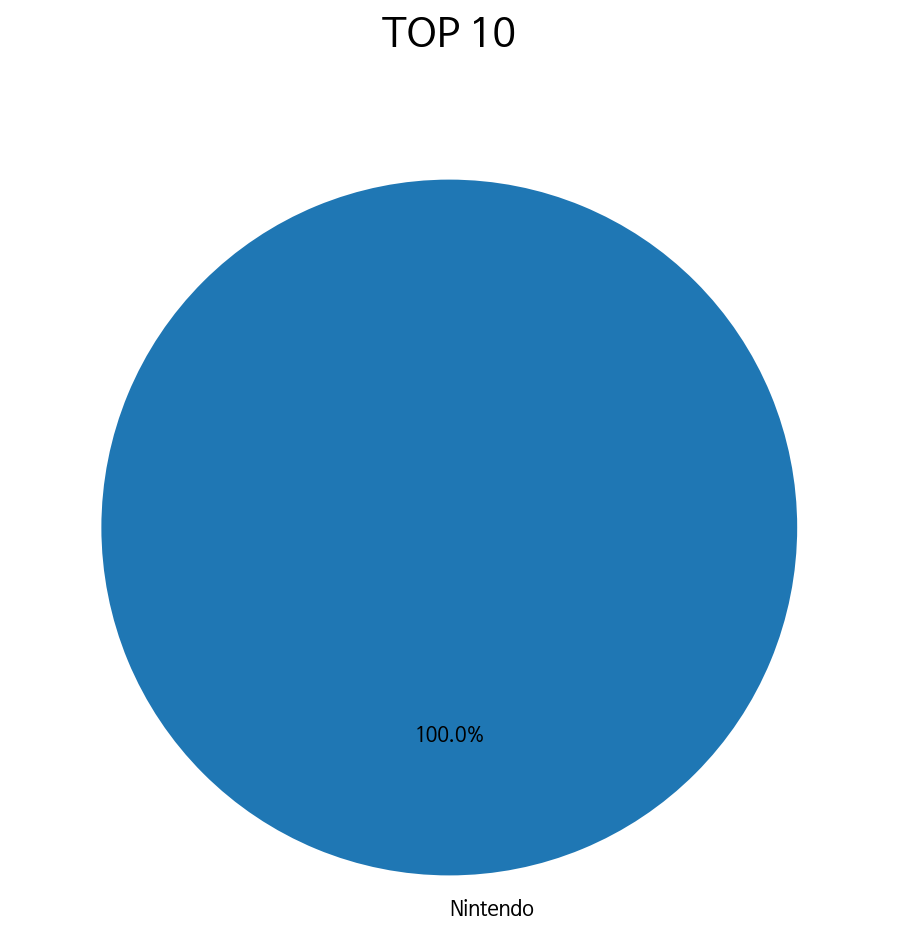

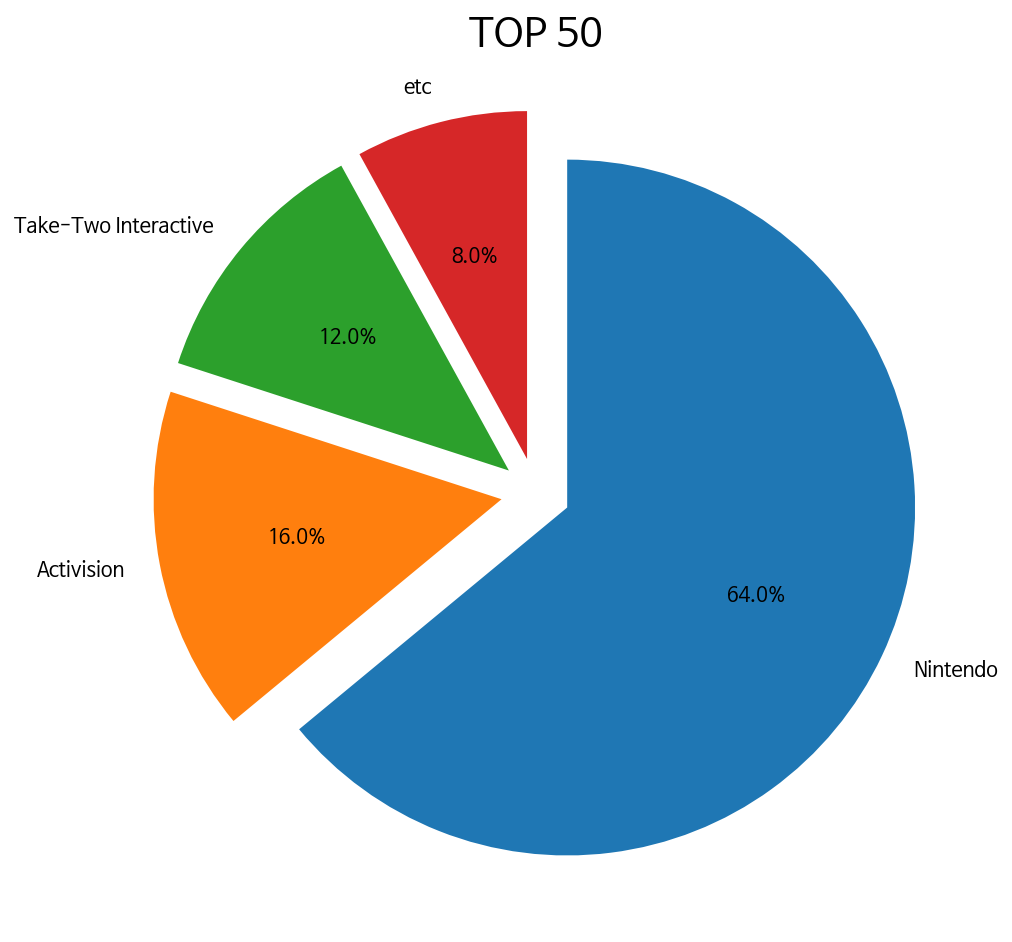

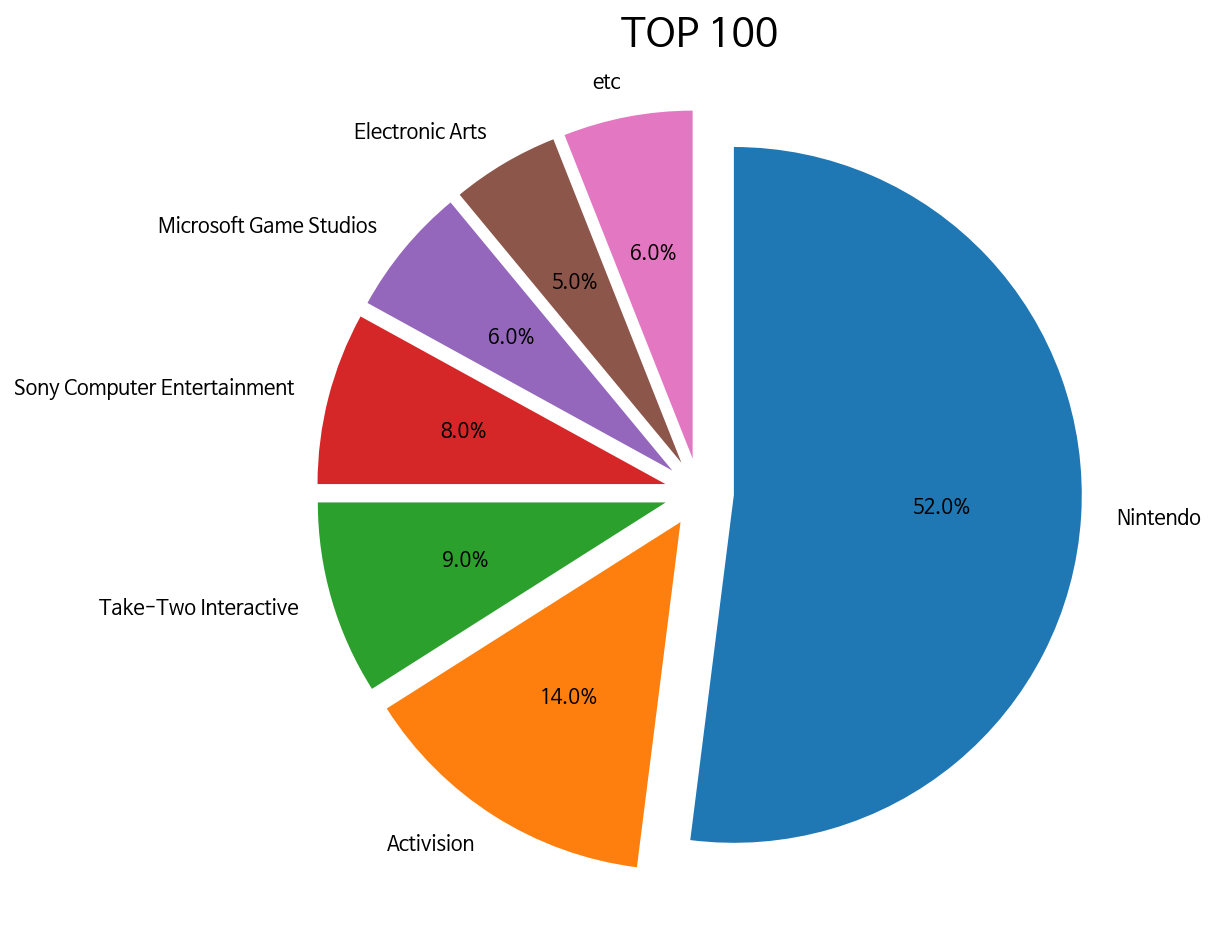

In [100]:
top10(5,[10, 50, 100],'Publisher')  # (portion, range, genre)

In [142]:
df_03_top10.to_csv('top10.csv')
df_03_top50.to_csv('top50.csv')
df_03_top100.to_csv('top100.csv')

In [101]:
df_03_top10

Unnamed: 0                       Name  ... Other_Sales Total_Sales
2908         2909                 Wii Sports  ...        8.46       82.74
4199         4200          Super Mario Bros.  ...        0.77       40.24
12579       12580             Mario Kart Wii  ...        3.31       35.83
3352         3353          Wii Sports Resort  ...        2.96       33.00
7829         7830   Pokemon Red/Pokemon Blue  ...        1.00       31.38
1203         1204                     Tetris  ...        0.58       30.26
6937         6938      New Super Mario Bros.  ...        2.90       30.01
3014         3015                   Wii Play  ...        2.85       29.01
16531       16532  New Super Mario Bros. Wii  ...        2.26       28.61
10488       10489                  Duck Hunt  ...        0.47       28.31

[10 rows x 11 columns]

---
> 2010년 이후 데이터 분석

In [102]:
df_top = df
df_top['Total_Sales'] = round(df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales'], 2)
df_top = df_top.fillna('etc')

for i in range(1980,2010): 
    df_top = df_top[df_top['Year'] != i]

In [103]:
# 자동변수 지정
# 최신 데이터만 사용 (2010년 전의 데이터 제거)
# portion : 기준치 이하 장르에 대하여 etc(기타, 100%기준)로 처리할 비율
# range : 제일 높은 출고량 순으로 몇개 까지 볼것인가 ex) [10, 50, 100]
def top10_recent(portion,range,genre): 
    for i in range:
        globals()['df_top{}'.format(i)] = df_top.sort_values(by='Total_Sales', ascending=False).head(i)
        globals()['df_{}'.format(i)] = globals()['df_top{}'.format(i)][genre].value_counts()
        globals()['df_{}'.format(i)] = globals()['df_{}'.format(i)].reset_index()
        globals()['df_{}'.format(i)].loc[len(globals()['df_{}'.format(i)])] = globals()['df_{}'.format(i)].loc[globals()['df_{}'.format(i)][genre] < portion/100*len(globals()['df_top{}'.format(i)]),[genre]].sum(axis=0)
        globals()['df_{}'.format(i)] = globals()['df_{}'.format(i)].fillna('etc')
        globals()['df_{}'.format(i)] = globals()['df_{}'.format(i)][globals()['df_{}'.format(i)][genre] >= portion/100*len(globals()['df_top{}'.format(i)])]
        pie_chart2(i,genre) # 파이차트 함수 호출

In [104]:
# 파이차트 함수
def pie_chart2(i,genre):
    explode = [] 
    for x in range(len(globals()['df_{}'.format(i)])):
        explode.append(0.1)

    plt.rcParams["figure.figsize"] = (12, 8)
    plt.pie(globals()['df_{}'.format(i)][genre], labels =globals()['df_{}'.format(i)]['index'] , autopct='%.1f%%', counterclock=False, startangle=90, explode=explode,shadow=False)
    plt.title('TOP {}'.format(i), fontsize=20);
    plt.show()

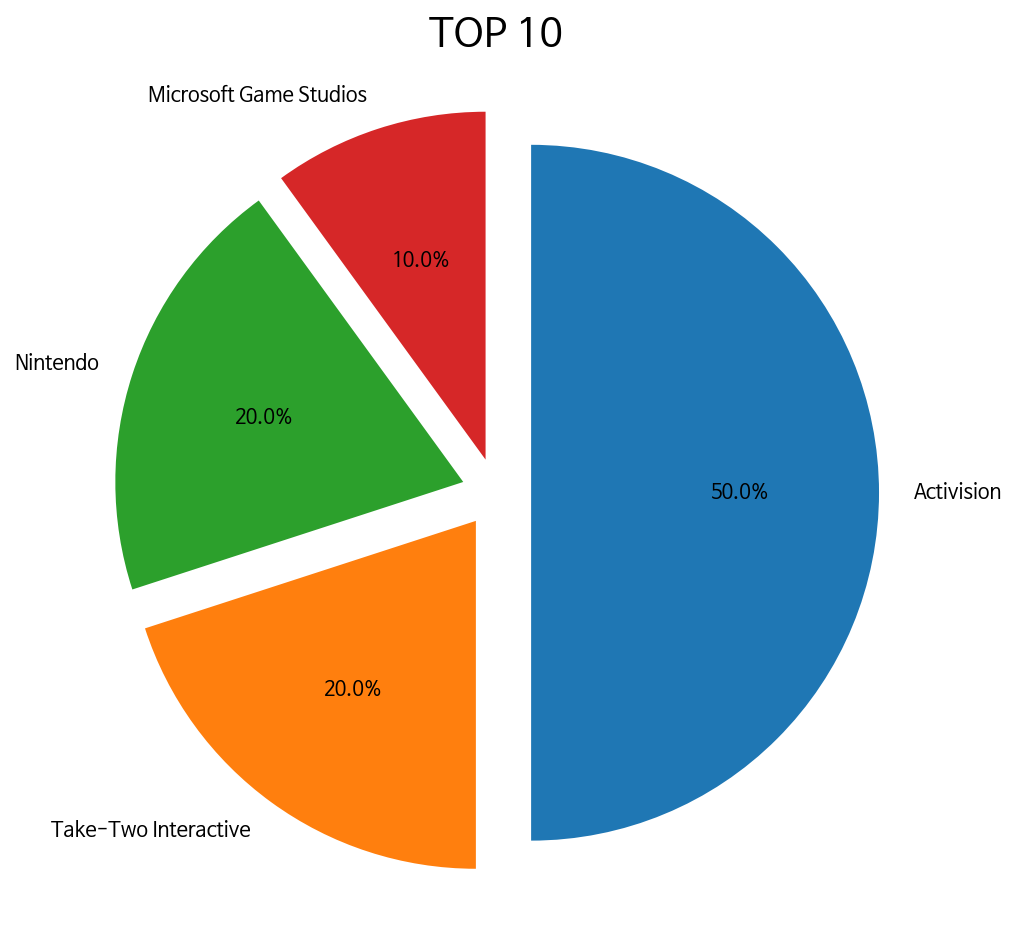

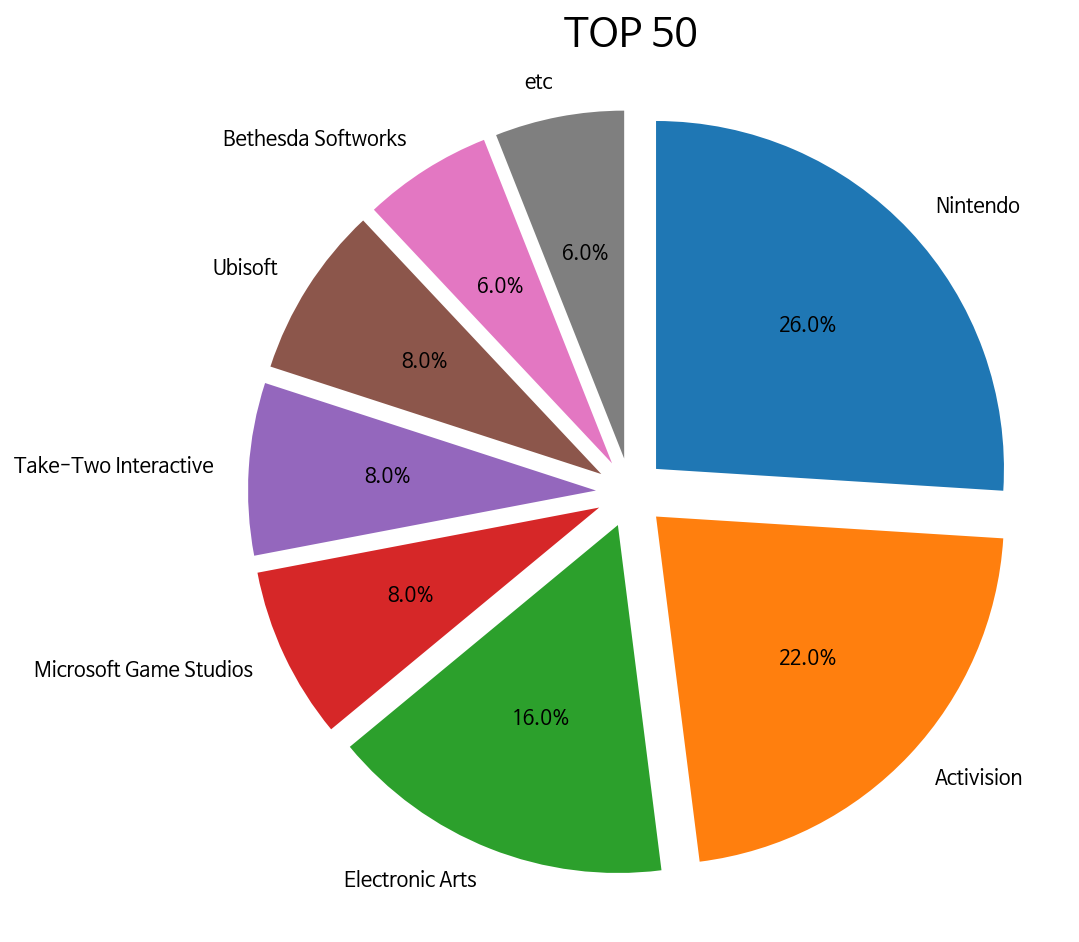

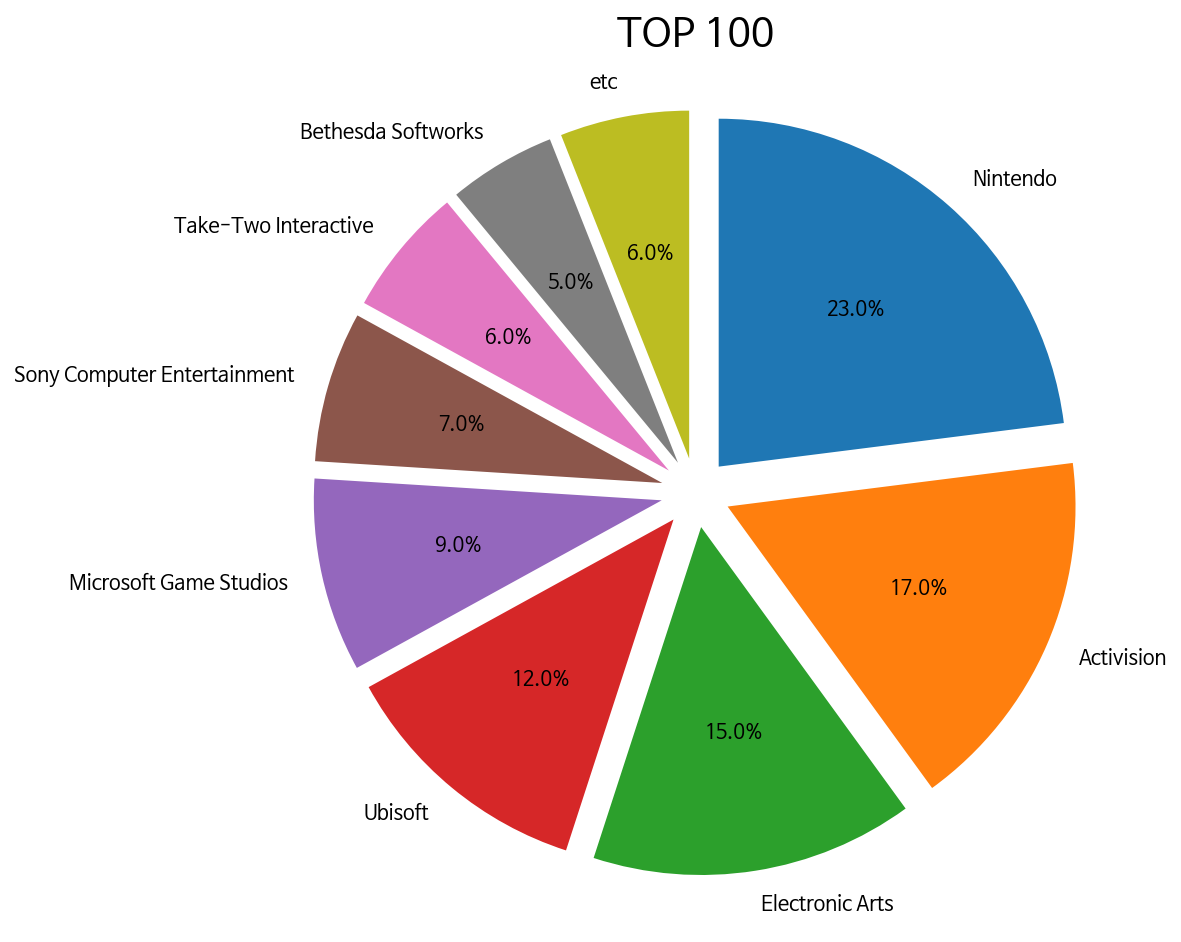

In [161]:
top10_recent(5,[10, 50, 100],'Publisher')  # (portion, range, genre)

In [143]:
df_top10.to_csv('top10_recent.csv')
df_top50.to_csv('top50_recent.csv') 
df_top100.to_csv('top100_recent.csv') 

---
> 장르와 플랫폼과의 관계 

In [106]:
df_04 = df_03
df_04 = df_04.drop(['Unnamed: 0','Name','Year','NA_Sales','EU_Sales','JP_Sales','Other_Sales'],axis=1) 
df_04

Platform      Genre                    Publisher  Total_Sales
0           DS     Action                    Destineer         0.04
1          Wii     Action           Namco Bandai Games         0.18
2          PSP  Adventure                    Alchemist         0.02
3           DS       Misc                    Zoo Games         0.04
4          PS3   Platform                  D3Publisher         0.25
...        ...        ...                          ...          ...
16593       GC   Platform                Vivendi Games         0.20
16594      PSP     Action            Rising Star Games         0.01
16595      PS3     Sports         Take-Two Interactive         0.79
16596      PSV     Action                   Tecmo Koei         0.38
16597       PS   Fighting  Sony Computer Entertainment         0.17

[16598 rows x 4 columns]

In [153]:
# 귀무가설, 대립가설 함수
def rel(range, string1, string2): 
    for i in range:
        globals()['df_04_top{}'.format(i)] = df_04.sort_values(by='Total_Sales', ascending=False).head(i)
        obs = pd.crosstab(globals()['df_04_top{}'.format(i)][string1], globals()['df_04_top{}'.format(i)][string2])
        chi2, pv, dof, expected = stats.chi2_contingency(obs, correction=False)
        print('TOP',i,'게임의',string1, '와 ', string2, '의 연관 여부')
        print('- 귀무가설 :', string1,'와',string2,'은 관계가 없다.')
        print('- 대립가설 :', string1,'와',string2,'은 관계가 있다.')
        #print('p-value는 : ',pv)
        if pv >= 0.05:
            print('귀무가설 채택 :', 'p-value 값이', round(pv,2),'으로 0.05 보다 큼')
        else  :
            print('귀무가설 기각 :', 'p-value 값이', round(pv,2),'으로 0.05 보다 작음')

In [154]:
rel([10],'Genre','Platform')

TOP 10 게임의 Genre 와  Platform 의 연관 여부
- 귀무가설 : Genre 와 Platform 은 관계가 없다.
- 대립가설 : Genre 와 Platform 은 관계가 있다.
귀무가설 채택 : p-value 값이 0.41 으로 0.05 보다 큼


In [155]:
rel([100],'Genre','Platform')

TOP 100 게임의 Genre 와  Platform 의 연관 여부
- 귀무가설 : Genre 와 Platform 은 관계가 없다.
- 대립가설 : Genre 와 Platform 은 관계가 있다.
귀무가설 기각 : p-value 값이 0.0 으로 0.05 보다 작음


---
> 장르와 퍼블리셔와의 관계

In [156]:
rel([10],'Genre','Publisher')

TOP 10 게임의 Genre 와  Publisher 의 연관 여부
- 귀무가설 : Genre 와 Publisher 은 관계가 없다.
- 대립가설 : Genre 와 Publisher 은 관계가 있다.
귀무가설 채택 : p-value 값이 1.0 으로 0.05 보다 큼


In [157]:
rel([100],'Genre','Publisher')

TOP 100 게임의 Genre 와  Publisher 의 연관 여부
- 귀무가설 : Genre 와 Publisher 은 관계가 없다.
- 대립가설 : Genre 와 Publisher 은 관계가 있다.
귀무가설 기각 : p-value 값이 0.0 으로 0.05 보다 작음


---
> 퍼블리셔와 플램폼과의 관계

In [158]:
rel([10],'Publisher','Platform')

TOP 10 게임의 Publisher 와  Platform 의 연관 여부
- 귀무가설 : Publisher 와 Platform 은 관계가 없다.
- 대립가설 : Publisher 와 Platform 은 관계가 있다.
귀무가설 채택 : p-value 값이 1.0 으로 0.05 보다 큼


In [159]:
rel([100],'Publisher','Platform')

TOP 100 게임의 Publisher 와  Platform 의 연관 여부
- 귀무가설 : Publisher 와 Platform 은 관계가 없다.
- 대립가설 : Publisher 와 Platform 은 관계가 있다.
귀무가설 기각 : p-value 값이 0.0 으로 0.05 보다 작음


 > 결론 :  인기가 가장 많은 TOP10 게임은 장르, 플랫폼, 퍼블리셔간의 관계가 전혀 없지만, 일반적인 게임에 있어서는 서로의 관계가 매우 밀접하다.

---

### 4. 결론
> 1. 북미, 유럽, 기타 지역은 **슈팅**이 인기 / 일본은 **RPG**가 인기 / 전 지역에 걸처서 **플래폼**이 인기
> 2. 2010년 이후 2012년을 기준으로 **플래폼**은 감소, **슈팅**은 증가
> 3. TOP10(장르) : 슈팅, 액션 / TOP100(장르) : 액션, 슈팅, RPG
> 4. TOP10(플래폼) : 엑스박스, 플레이스테이션 / TOP100(플래폼) : 엑스박스, 플레이스테이션
> 5. TOP10(퍼블리셔) : Activision, Take-Two interactive / TOP100(플래폼) : Nintendo, Activision, EA
> 6. TOP10에서는 장르, 플래폼, 퍼블리셔간 관계없고/ 일반적으로는 관계가 있음
> 7. 일반적으로 **플레이스테이션**, **엑스박스**가 인기가 많음(PC 게임은 상대적으로 자료가 적어 유의미한 분석 못함)
> 8. Activision, Ninteno, EA 회사가 돈을 많이 벌었음

> 